In [1]:
# Libary Imports
import pandas as pd
import numpy as np
from scipy.stats import norm,t 
import matplotlib.pyplot as plt
import sys

# Local Import
sys.path.insert(0, '../')
from utility import load_currency
from functions import VAR, CVAR

In [2]:
# Load Data
df = load_currency('DASH',columns=['close'])
df.head()

,close
time,
2018-01-02 11:00:00,1092.99
2018-01-02 12:00:00,1089.11
2018-01-02 13:00:00,1113.63
2018-01-02 14:00:00,1104.40
2018-01-02 15:00:00,1100.28


In [3]:
# Returns
r = df['close'].pct_change().dropna()

# Plotting: VaR & CVaR

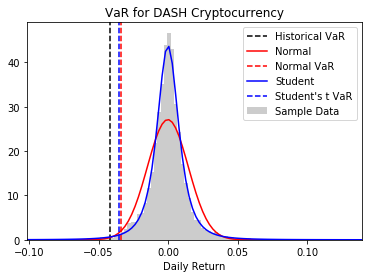

In [4]:
# Significance Level
alpha = 0.01

# Defining Grid
nbins = 100
minv = np.min(r)
maxv = np.max(r)
x = np.linspace(minv,maxv,nbins)

# Initialize figure
fig, ax = plt.subplots()
ax.set(xlim=[minv,maxv], xlabel='Daily Return' )
ax.set_title("VaR for DASH Cryptocurrency")

# Fit Empirical Distribution and compute non-parametric VaR & CVaR
grey = .80, .80, .80
ax.hist(r,nbins,density=True,label='Sample Data',color=grey)

VaR_Historical = VAR(r,alpha)
CVaR_Historical = CVAR(r,alpha)
ax.axvline(-VaR_Historical,color='k', linestyle='--',label='Historical VaR')

# Fit Normal Distribution and compute parametric VaR & CVaR
mu, sigma = norm.fit(r)

VaR_Normal = mu + sigma*norm.ppf(1-alpha)
CVaR_Normal = mu+sigma*norm.pdf(norm.ppf(0.05))/0.05

ax.plot(x,norm.pdf(x,loc = mu, scale = sigma),'r',label ='Normal')
ax.axvline(-VaR_Normal,color='r', linestyle='--',label='Normal VaR')

# Fit Student's t-Distribution and compute VaR & CVaR
df, loc, scale  = t.fit(r)

sigma_t = np.sqrt((df-2)/df) * sigma
VaR_Student = mu + sigma_t * t.ppf(1-alpha,df)
xanu = t.ppf(alpha, df) 
CVaR_Student = mu + sigma * -1/alpha * (1-df)**(-1) * (df-2+xanu**2) * t.pdf(xanu, df)

ax.plot(x,t.pdf(x,loc = loc, scale = scale,df=df),'b',label ='Student')
ax.axvline(-VaR_Student, color='b', linestyle='--', label="Student's t VaR")

ax.legend()

In [6]:
print(f"Historical VaR    = {VaR_Historical:.4f}")
print(f"Historical CVaR    = {CVaR_Historical:.4f}")
print(f"Student's t-VaR = {VaR_Student:.4f}")
print(f"Student's t-CVaR = {CVaR_Student:.4f}")
print(f"Normal VaR    = {VaR_Normal:.4f}")
print(f"Normal CVaR    = {CVaR_Normal:.4f}")
# http://www.quantatrisk.com/2015/12/02/student-t-distributed-linear-value-at-risk/ 
# http://www.quantatrisk.com/2016/12/08/conditional-value-at-risk-normal-student-t-var-model-python/

Historical VaR    = 0.0414
Historical CVaR    = 0.0539
Student's t-VaR = 0.0351
Student's t-CVaR = 0.1239
Normal VaR    = 0.0340
Normal CVaR    = 0.0301
